<a href="https://colab.research.google.com/github/Faraaztqureshi/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Faraaz_Qureshi_012_DS10_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
## lets get the data into a list
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [3]:
## now to take a the sum of the list
sum_sales = sum(sales)
print(sum_sales)


21369


In [4]:
## now we need to divide the sum by number of items in list
number_of_sales = len(sales)
print(number_of_sales)

7


In [5]:
## now to find the mean which is sum of values divided by number of values
mean_sales = (sum_sales / number_of_sales)
print(mean_sales)

3052.714285714286


In [8]:
## lets use our libraries to see how we did
import pandas as pd
import numpy as np
np.mean(sales)

3052.714285714286

In [12]:
## now to calculate variance by hand
# calculate mean
m = sum(sales) / len(sales)

# calculate variance using a list comprehension
variance = sum((xi - m) ** 2 for xi in sales) / len(sales)
print(variance)

183761.06122448976


In [13]:
## use numpy to check our work
np.var(sales)

183761.06122448976

In [14]:
## now to do standard deviation
## since the standard deviation is the square of the var
m = sum(sales) / len(sales)
variance = sum((xi - m) ** 2 for xi in sales) / len(sales)
standard_deviation = variance ** 0.5
print(standard_deviation)

428.67360686714756


In [15]:
## check our work using numpy
np.std(sales)

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
## first put data into a variable
customers = [127, 80, 105, 92, 120, 115, 93]

In [17]:
## covariance between sales numbers and customer numbers
np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [18]:
## use numpy to find std of customers
np.std(customers)

15.792015549069118

In [0]:
## lets get all the pieces we need together
## sales mean
mean_sales
## customers mean
mean_customers = sum(customers) / len(customers)
## std of sales
sales_std = np.std(sales)
## std of customers
customers_std = np.std(customers)


In [0]:
import math

def pearson(x,y):
    scorex = []
    scorey = []

    for i in x: 
        scorex.append((i - (mean_sales))/(sales_std)) 

    for j in y:
        scorey.append((j - (mean_customers))/(customers_std))

# multiplies both lists together into 1 list (zip) and sums the whole list   
    return (sum([i*j for i,j in zip(scorex,scorey)]))/(len(x))

In [31]:
## I was stuck here for a while because my result did not match
## after checking every element, I realized what I was dividing by was wrong
## I was dividing by n-1 not n
pearson(sales, customers)

0.962833977814891

In [34]:
np.corrcoef(sales, customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [41]:
## inspect what we have
df.head()
df.shape
df.columns
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [44]:
## calculate var-covar using numpy
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [45]:
## correlation matrix 
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
## lets get matplotlib going
import matplotlib.pyplot as plt

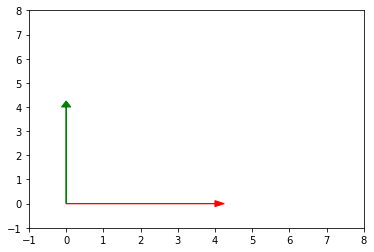

In [49]:
a = [0, 4]
b = [4, 0]

plt.arrow(0, 0, a[0], a[1], head_width=.25, head_length=0.25, color ='green')

plt.arrow(0, 0, b[0], b[1],head_width=.25, head_length=0.25,  color = 'red')
plt.xlim(-1, 8)
plt.ylim(-1, 8)
plt.show()

# A synonym for orthogonal would be perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [56]:
## these will be orthogonal if the dot product is 0
a = [[5], [3], [7]]
a = np.array(a)
b = [[6], [-8], [2]]
b = np.array(b)
print(b)

[[ 6]
 [-8]
 [ 2]]


In [57]:
## now to do the dot product
np.dot(a, b)

ValueError: ignored

In [59]:
np.linalg.norm(a) - np.linalg.norm(b)

-1.0876054480412698

# These are not orthogonal because their dot product does not equal 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [60]:
## first input c
c = [[2, -16, 6, 20]]
c = np.array(c)
print(c)

[[  2 -16   6  20]]


In [61]:
## the first question is asking for the squared value of the norm
np.linalg.norm(c)**2

696.0

In [64]:
## the next question product
c * c

array([[  4, 256,  36, 400]])

In [67]:
c1 = c.T
c1

array([[  2],
       [-16],
       [  6],
       [ 20]])

In [69]:
np.matmul(c, c1)

array([[696]])

In [70]:
np.dot(c1, c)

array([[   4,  -32,   12,   40],
       [ -32,  256,  -96, -320],
       [  12,  -96,   36,  120],
       [  40, -320,  120,  400]])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
 d = \begin{bmatrix} 7 \\ 12 \ \end{bmatrix} =
\end{align}

 \begin{align}
 \vec{d} = 7 \hat{i} + 12 \hat{j} 
\end{align}

 \begin{align}
 \vec{e} = 2 \hat{i} + 11 \hat{j} - 8 \hat{k} 
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [74]:
## unit vector using numpy
f = [[4, 12, 11, 9, 2]]
f = np.array(f)
np.linalg.norm(f)


19.131126469708992

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

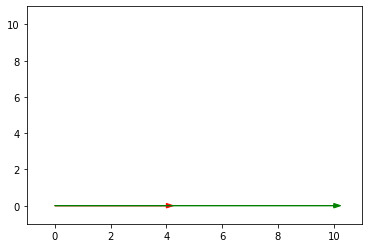

In [80]:
## linear dependence
a = [4, 0]
b = [10, 0]

plt.arrow(0, 0, a[0], a[1], head_width=.25, head_length=0.25, color ='red')

plt.arrow(0, 0, b[0], b[1],head_width=.25, head_length=0.25,  color = 'green')
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.show()

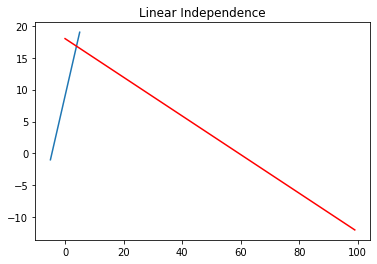

In [108]:
## linear independence
x = np.linspace(-5,5,100)
y = 2*x+9
z= -3*x+3
plt.plot(x, y, z, '-r')
plt.title('Linear Independence')


plt.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
1 dimensional space since we could multiply g by a scalor of 4

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
3 dimensional space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



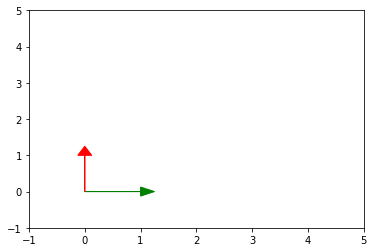

In [110]:
a = [1, 0]
b = [0, 1]

plt.arrow(0, 0, a[0], a[1], head_width=.25, head_length=0.25, color ='green')

plt.arrow(0, 0, b[0], b[1],head_width=.25, head_length=0.25,  color = 'red')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.show()

## 6.2 What does it mean to form a basis?

We want the vectors to span the vector space we also want the vectors in the set to be linearly independent.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [111]:
## lets save the matrix as an np array
p = [[1, 2, 3], [-1, 0, 7], [4, 8, 2]]
p = np.array(p)
print(p)

[[ 1  2  3]
 [-1  0  7]
 [ 4  8  2]]


In [112]:
## use numpy to get the rank
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

# The rank tells us how many dimensions.  1 means one dimension, 2 means two dimensions and 3 means three dimensions.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

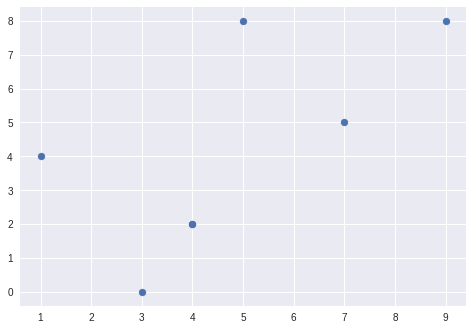

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()